# Which Neighborhood is the Best in Pittsburgh?

## by Peter Ju and Leo Liang

### Introduction

The environment we live in is essential for it influences our health. Living in a place with a good environment protects your physical health and heals your sanity from the damages caused by modern lifestyles and troubles. We would like to know which Pittsburgh neighborhood is the best on an environmental and individual health basis.

### The Metrics

Our metric is the environment and individual health status in different neighborhoods in Pittsburgh. 
- Environment (Air Quality PM 2.5)
- Environment (Illegal Dump Sites)
- Individual Health (Hypertension + Hyperlipidemia) <br>

We will rank every neighborhood by the three datasets and add up their ranks at the end. The neighborhood with the lowest sum of the ranks will be our best neighborhood.

Datasets incorporated in our project includes:
- [Allegheny County Particulate Matter 2.5](https://data.wprdc.org/dataset/particulate-matter-2-5)
<br>This dataset includes data of PM 2.5 measured in Pittsburgh neighborhoods.
- [Allegheny County Illegal Dump Site](https://data.wprdc.org/dataset/allegheny-county-illegal-dump-sites)
<br>This dataset includes data of illegal dump sites and their estimated tons in Pittsburgh neighborhoods.
- [Hypertension + Hyperlipidemia Comorbidity](https://data.wprdc.org/dataset/hypertension-hyperlipidemia-comorbidity)
<br>This dataset includes data of hypertension and hyperlipidemia comorbidity prevalence in Pittsburgh neighborhoods.
- [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2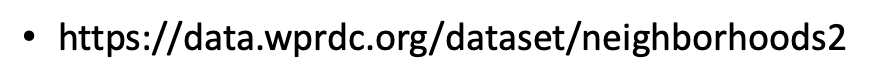)
<br>This dataset shows all neighborhoods and their locations in Pittsburgh.

### Metric: Air Quality by Neighborhood

#### By Peter Ju

Link to the dataset: [Allegheny County Particulate Matter 2.5](https://data.wprdc.org/dataset/particulate-matter-2-5)

Import Python modules

In [1]:
import geopandas as geopd
import pandas as pd

Read data

In [2]:
pm25 = pd.read_csv("Data/pm25.csv")
pm25.head()

,CensusTract,PM25
0,10300,12.264655
1,20100,12.283052
2,20300,12.241216
3,30500,12.234197
4,40200,12.315312


As we can see, the above dataset contains information about the air quality in different places specified by the Census Tract number.

We want to show this on a neighborhood map eventually, so let us load the shapefile by geopandas.

In [3]:
neighborhoods = geopd.read_file("Data/pittsburghpaneighborhoods-/Neighborhoods_.shp")
neighborhoods.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."


We can now create a DataFrame to store everything we have for the air quality index and the neighborhoods shapefile since we will not need every column in the two datasets.

In [4]:
neighborhood_pm25 = pd.DataFrame(columns = ["Neighborhood", "tractce10", "PM25"])
neighborhood_pm25["Neighborhood"] = neighborhoods["hood"]
neighborhood_pm25["tractce10"] = neighborhoods["tractce10"]

neighborhood_pm25[["PM25"]] = neighborhood_pm25[["PM25"]].astype(float)
neighborhood_pm25

,Neighborhood,tractce10,PM25
0,Point Breeze North,140500,NaN
1,Squirrel Hill North,140100,NaN
2,Garfield,101700,NaN
3,Bedford Dwellings,050900,NaN
4,Knoxville,300100,NaN
...,...,...,...
85,Regent Square,141000,NaN
86,Terrace Village,051100,NaN
87,Elliott,562600,NaN
88,South Side Flats,170200,NaN


Now let us iterate through ```pm25``` to fill in the ```NaN```s.

In [ ]:
for ignored, row in pm25.iterrows():
    ct = row["CensusTract"]
    for index, each_neighborhood in neighborhood_pm25.iterrows():
        if str(each_neighborhood["tractce10"]) == "None":
            continue
        else:
            if float(str(each_neighborhood["tractce10"])) == float((str(ct))):
                if pd.isna(neighborhood_pm25.at[index, "PM25"]):
                    neighborhood_pm25.at[index, "PM25"] = row["PM25"]
            
neighborhood_pm25

We can sort the DataFrame ascendingly since a smaller PM25 value indicates better air quality.

In [ ]:
neighborhood_pm25 = neighborhood_pm25.sort_values("PM25", ascending=True)
neighborhood_pm25.head(10)

The below bar graph shows the distribution of the PM 2.5 values among neighborhoods:

In [ ]:
plot = neighborhood_pm25.plot(kind='bar', x="Neighborhood", y="PM25", title="PM 2.5 by Neighborhood", figsize=(20,10)).set_ylim([12,12.5])

Let us make a map to see how the PM2.5 in one neighborhood differs from another.

In [ ]:
neighborhoods["PM25"] = neighborhood_pm25["PM25"]

neighborhoods.plot(column="PM25", legend=True, figsize=(10,10))

The rank of neighborhoods for this metric will be:

In [ ]:
rank = pd.DataFrame(columns=["Neighborhood", "Rank_PM25", "Rank_Dump", "Rank_Hype", "Total"])

rank["Neighborhood"] = neighborhood_pm25["Neighborhood"]
rank["Rank_PM25"] = 0
rank["Rank_Dump"] = 0
rank["Rank_Hype"] = 0
rank["Total"] = 0

counter, hist_counter = 1, 1

value = neighborhood_pm25.iloc[0, 2]

for index, row in neighborhood_pm25.iterrows():
    current_value = row["PM25"]
    
    if current_value == value:
        rank.loc[rank["Neighborhood"] == row["Neighborhood"], "Rank_PM25"] = hist_counter
        counter += 1
    else:
        rank.loc[rank["Neighborhood"] == row["Neighborhood"], "Rank_PM25"] = counter
        hist_counter = counter
        counter += 1
        value = current_value

rank.sort_values(by=["Rank_PM25"]).head(10)

### Illegal Dump Sites by Neighborhood

#### By Peter Ju

Link to the dataset:  [Allegheny County Illegal Dump Sites](hhttps://data.wprdc.org/dataset/allegheny-county-illegal-dump-sites)

Read data

In [ ]:
dump = pd.read_csv("Data/dump-site.csv")
dump.head()

We want to do data preprocessing to convert certain columns to ```float``` type and eliminate ineffective rows.

In [ ]:
dump = dump.loc[dump["estimated_tons"] != "Undetermined"]
dump = dump.loc[dump["estimated_tons"] != "Not Applicable"]
dump = dump[dump["estimated_tons"].notna()]
dump[["estimated_tons"]] = dump[["estimated_tons"]].astype(float)
dump[["latitude"]] = dump[["latitude"]].astype(float)
dump[["longitude"]] = dump[["longitude"]].astype(float)

The shapefile would be the same as the one we previously used. Let us load that in again.

In [ ]:
neighborhoods = geopd.read_file("Data/pittsburghpaneighborhoods-/Neighborhoods_.shp")
neighborhoods.head()

We can now create a DataFrame to store everything we want: the dump sites and the name of the neighborhoods, which is what we use in this scenario to assign dump amount to which neighborhood it is in.

In [ ]:
neighborhood_dump = pd.DataFrame(columns = ["Neighborhood", "Amount"])
neighborhood_dump["Neighborhood"] = neighborhoods["hood"]

neighborhood_dump[["Amount"]] = 0
neighborhood_dump

Now iterate through the dataset:

In [ ]:
for ignored, row in dump.iterrows():
    
    for index, neighborhood in neighborhood_dump.iterrows():
        if neighborhood["Neighborhood"] == row["Neighborhood"]:
            if neighborhood_dump.at[index, "Amount"] == 0:
                neighborhood_dump.at[index, "Amount"] = row["estimated_tons"]
            else:
                neighborhood_dump.at[index, "Amount"] = neighborhood_dump.at[index, "Amount"] + row["estimated_tons"]

neighborhood_dump

We can sort the DataFrame ascendingly since a smaller value indicates that the neighborhood has less illegal dump sites.

In [ ]:
neighborhood_dump = neighborhood_dump.sort_values("Amount", ascending=True)
neighborhood_dump.head(20)

This does not give us much insight. So let us look at the rows at the end.

In [ ]:
neighborhood_dump.tail(20)

Below is a bargraph of the data we have.

In [ ]:
plot = neighborhood_dump.plot(kind='bar', x="Neighborhood", y="Amount", title="Illegal Dump Site by Neighborhood", figsize=(20,10))

Beltzhoover has a very interesting amount here. To put that in a map:

In [ ]:
neighborhoods["Amount"] = neighborhood_dump["Amount"]

neighborhoods.plot(column="Amount", legend=True, figsize=(10,10))

The rank of neighborhoods for this metric will be:

In [ ]:
counter, hist_counter = 1, 1

value = neighborhood_dump.iloc[0, 1]

for index, row in neighborhood_dump.iterrows():
    current_value = row["Amount"]
    
    if current_value == value:
        rank.loc[rank["Neighborhood"] == row["Neighborhood"], "Rank_Dump"] = hist_counter
        counter += 1
    else:
        rank.loc[rank["Neighborhood"] == row["Neighborhood"], "Rank_Dump"] = counter
        hist_counter = counter
        counter += 1
        value = current_value
    
rank.sort_values(by=["Rank_Dump"])

### Hypertension By Neighborhoods
#### by Leo Liang

#### We first start by importing the necessary pandas for our datasets,
##### then read in our first file: the dataset on hypertension and hyperlipidemia

In [ ]:
import geopandas as gpd
import pandas as pd

hyper_data = gpd.read_file("Data/hypertension_hyperlipidemia_all.csv")

#insert mickey mouse secret tool used for later here
hyper_data

#### The column names don't really tell us anything, so either we trust my description of each column (totaly reliable :]) or we can rely on the data dictionary for this data set.

In [ ]:
diction = pd.read_csv("Data/hypertension-data-dictionary.csv")
diction

#### Damn word cut offs...

In [ ]:
i = 0
for d in diction["description"]:
    print(diction.loc[i, "column"]+":", d)
    i+=1

#### From this, we can see that *LTPAD* is the total number of people with within this research's population, whereas *LTPAN* is the total number of people diagnosed with Hypertension and Hyperlipidemia.
  
### Now, lets start plotting

#### First, we import a file containing different census tracks and the respective neighborhood it maps to:

In [ ]:
mapdata = gpd.read_file("Data/pittsburghpaneighborhoods-/Neighborhoods_.shp")
mapdata

#### Now, trust me this time that there is a neighborhoods column because text cut off sucks sometimes :P

#### We then make a Dataframe containting the cenus tracts to their respective neighborhoods

In [ ]:
neighborhoods = pd.DataFrame(columns = ["CT", "Neighborhoods", "Condition Average"])
neighborhoods["CT"] = mapdata["tractce10"]
neighborhoods["Neighborhoods"] = mapdata["hood"]

neighborhoods

#### Now that we have this table of, all thats left is to populate it with the neighborhood's statistics for hypertension and hyperlipidemia

In [ ]:
hyper = hyper_data.set_index("CT")
neigh = neighborhoods.set_index("CT")

for i, row in hyper.iterrows():
    for j, row2 in neigh.iterrows():
        if i == j:
            if float(row["LTPAD"]) < 50:          #elminates neighborhoods with less than 50 total samples
                continue
            row2["Condition Average"] = float(row["LTPAN"])/float(row["LTPAD"])
            break
neigh

#### Data for some neighborhoods are missing due to the research csv file not having data on some neighborhoods

In [ ]:
neigh = neigh.sort_values("Condition Average", ascending=True)
neigh

#### Now we can plot the data as a bar graph to visualize it

In [ ]:
plot = neigh.plot(kind='bar', x="Neighborhoods", y="Condition Average", title="Hypertension/Hyperlipidemia by Neighborhood", figsize=(20,10))

#### The neighborhoods with the lowest percentage of people afflicted with hypertension and hyperlipidemia are towards the left side  

#### Now lets map the data to visualize which region is the best

In [ ]:
neigh[["Condition Average"]] = neigh[["Condition Average"]].astype(float)

neigh = neigh.reset_index()
mapdata["Condition Average"] = neigh["Condition Average"]

mapdata.plot(column="Condition Average", legend=True, figsize=(10,10))

The rank of neighborhoods for this metric will be:

In [ ]:
counter, hist_counter = 1, 1

value = neigh.iloc[0, 1]

for index, row in neigh.iterrows():
    current_value = row["Condition Average"]
    
    if current_value == value:
        rank.loc[rank["Neighborhood"] == row["Neighborhoods"], "Rank_Hype"] = hist_counter
        counter += 1
    else:
        rank.loc[rank["Neighborhood"] == row["Neighborhoods"], "Rank_Hype"] = counter
        hist_counter = counter
        counter += 1
        value = current_value
    
rank.sort_values(by=["Rank_Hype"])

#### It seems that the Northeast region of Pittsburgh may have the lowest rate of hypertension and hyperlipidemia!

### Best Neighborhood

To find out which neighborhood is the best, we just add up the rank number in three metrics. The best neighborhood is the one with the least sum amongst all.

In [ ]:
for index, row in rank.iterrows():
    rank.at[index, "Total"] = row["Rank_PM25"] + row["Rank_Dump"] + row["Rank_Hype"]
    
rank.sort_values(by=["Total"]).head(10)

And the winner goes to Upper Lawrenceville!

Putting the ranks on a map:

In [ ]:
neighborhoods = geopd.read_file("Data/pittsburghpaneighborhoods-/Neighborhoods_.shp")

neighborhoods["Rank"] = 0

for index, row in rank.iterrows():
    neighborhoods.loc[neighborhoods["hood"] == row["Neighborhood"], "Rank"] = row["Total"]

neighborhoods.plot(column="Rank", legend=True, figsize=(10,10))

### Conclusion

**Peter**: It is kind of suprising to see Upper Lawrenceville is having a total rank this low compared to its opponents. To be honest, I am not really familiar with that many neighborhoods inside Pittsburgh since I have not been very long here. However, to a certain aspect, the neighborhood with a good environment often times make people healthier and happier living there. It seems that smaller aspects of environments somehow correlates with each other - that is, say, if a neighborhood has better air quality, then it might also be cleaner than the other neighborhoods.

**Leo**: I haven't really explored much of Pittsburgh outside of Oakland and a few other places, so my hypothesized winner was decided with complete familiority bias (North O). Personally I think this data driven approach may correlate with some aspects of a neighborhood such as sick population or general wealth which are factors in whether a neighborhood is "good" or not. However, This approach may also miss important things that make a neighborhood great such as culture or opportunities.